# <div align="center">**Analisis Multimetode dan Backtesting Interval Christoffersen dalam Pengukuran Value at Risk pada Portfolio Barang Konsumen Primer**</div>

#### <div align="center">*Metode Historical Simulation, Bootstrap VaR, Age-Weighted VaR, Volatility-Weighted VaR, dan Filtered Historical Simulation*</div>

<div align="center">

Aulia Mirfah Setyo Ayu Damayanti (22/493337/PA/21178)

Program Studi Statistika, Fakultas Matematikan dan Ilmu Pengetahuan Alam, Universitas Gadjah Mada, Sekip Utara No.21, Bulaksumur, Yogyakarta, 55281, Indonesia

auliamirfahsetyoayudamayanti@mail.ugm.ac.id</div>


---

In [ ]:
#pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [16]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from scipy.stats import kstest, norm
from statsmodels.stats.diagnostic import acorr_ljungbox, het_breuschpagan
import statsmodels.api as sm

In [17]:
# Diambil data saham dari 17 September 2023 sampai 17 September 2024
dairy_products_ticker = ['CMRY.JK', 'CAMP.JK', 'ULTJ.JK', 'KEJU.JK']

dairy_products_data = yf.download(dairy_products_ticker, start='2024-01-01', end='2024-12-01', group_by='ticker')
dairy_products_data

[*********************100%***********************]  4 of 4 completed


Ticker                    KEJU.JK                                       \
Price                        Open    High     Low   Close    Adj Close   
Date                                                                     
2024-01-02 00:00:00+00:00  1135.0  1160.0  1135.0  1150.0  1102.382812   
2024-01-03 00:00:00+00:00  1145.0  1165.0  1145.0  1155.0  1107.175781   
2024-01-04 00:00:00+00:00  1155.0  1155.0  1145.0  1150.0  1102.382812   
2024-01-05 00:00:00+00:00  1145.0  1165.0  1145.0  1165.0  1116.761719   
2024-01-08 00:00:00+00:00  1160.0  1170.0  1155.0  1170.0  1121.554688   
...                           ...     ...     ...     ...          ...   
2024-11-22 00:00:00+00:00  1670.0  1715.0  1650.0  1690.0  1690.000000   
2024-11-25 00:00:00+00:00  1690.0  1690.0  1665.0  1690.0  1690.000000   
2024-11-26 00:00:00+00:00  1690.0  1725.0  1650.0  1690.0  1690.000000   
2024-11-28 00:00:00+00:00  1670.0  1730.0  1665.0  1690.0  1690.000000   
2024-11-29 00:00:00+00:00  1695.0  1700.0  1660.0  1685.0  1685.000000   

Ticker                            CMRY.JK                          ...  \
Price                      Volume    Open    High     Low   Close  ...   
Date                                                               ...   
2024-01-02 00:00:00+00:00    4100  4010.0  4070.0  3960.0  3990.0  ...   
2024-01-03 00:00:00+00:00    3300  3990.0  4070.0  3870.0  4000.0  ...   
2024-01-04 00:00:00+00:00   12600  4000.0  4130.0  3950.0  4060.0  ...   
2024-01-05 00:00:00+00:00    8600  4160.0  4160.0  4030.0  4100.0  ...   
2024-01-08 00:00:00+00:00   16900  4070.0  4070.0  3940.0  4000.0  ...   
...                           ...     ...     ...     ...     ...  ...   
2024-11-22 00:00:00+00:00   58600  5325.0  5425.0  5250.0  5300.0  ...   
2024-11-25 00:00:00+00:00   37500  5300.0  5500.0  5300.0  5500.0  ...   
2024-11-26 00:00:00+00:00   96500  5525.0  5525.0  5325.0  5325.0  ...   
2024-11-28 00:00:00+00:00  237800  5400.0  5475.0  5325.0  5350.0  ...   
2024-11-29 00:00:00+00:00   50900  5400.0  5600.0  5375.0  5600.0  ...   

Ticker                    ULTJ.JK                                CAMP.JK  \
Price                         Low   Close    Adj Close    Volume    Open   
Date                                                                       
2024-01-02 00:00:00+00:00  1590.0  1650.0  1614.227661  12599100   402.0   
2024-01-03 00:00:00+00:00  1635.0  1685.0  1648.468750   5814900   386.0   
2024-01-04 00:00:00+00:00  1690.0  1755.0  1716.951172   6070300   394.0   
2024-01-05 00:00:00+00:00  1715.0  1745.0  1707.167969   3583800   390.0   
2024-01-08 00:00:00+00:00  1715.0  1755.0  1716.951172   4347000   390.0   
...                           ...     ...          ...       ...     ...   
2024-11-22 00:00:00+00:00  1700.0  1710.0  1710.000000    353500   258.0   
2024-11-25 00:00:00+00:00  1665.0  1665.0  1665.000000   4907100   270.0   
2024-11-26 00:00:00+00:00  1665.0  1665.0  1665.000000   1319500   270.0   
2024-11-28 00:00:00+00:00  1665.0  1775.0  1775.000000   3066500   270.0   
2024-11-29 00:00:00+00:00  1700.0  1780.0  1780.000000   2832600   268.0   

Ticker                                                                
Price                       High    Low  Close   Adj Close    Volume  
Date                                                                  
2024-01-02 00:00:00+00:00  402.0  378.0  386.0  367.619049   1255200  
2024-01-03 00:00:00+00:00  400.0  384.0  394.0  375.238098   1648500  
2024-01-04 00:00:00+00:00  400.0  388.0  390.0  371.428558    292300  
2024-01-05 00:00:00+00:00  394.0  388.0  390.0  371.428558    307400  
2024-01-08 00:00:00+00:00  392.0  380.0  382.0  363.809540    399600  
...                          ...    ...    ...         ...       ...  
2024-11-22 00:00:00+00:00  272.0  254.0  268.0  268.000000  13427400  
2024-11-25 00:00:00+00:00  294.0  266.0  268.0  268.000000   6448700  
2024-11-26 00:00:00+00:00  272.0  264.0  268.0  268.000000   1331400  
2024-11-2

In [18]:
# Pengecekan nilai `NA` pada data
dairy_products_data.isna().sum()

Ticker   Price    
KEJU.JK  Open         0
         High         0
         Low          0
         Close        0
         Adj Close    0
         Volume       0
CMRY.JK  Open         0
         High         0
         Low          0
         Close        0
         Adj Close    0
         Volume       0
ULTJ.JK  Open         0
         High         0
         Low          0
         Close        0
         Adj Close    0
         Volume       0
CAMP.JK  Open         0
         High         0
         Low          0
         Close        0
         Adj Close    0
         Volume       0
dtype: int64

In [19]:
# Pembersihan data dari nilai `NA`
df = dairy_products_data.dropna(axis=1, how='any')
df.head()

Ticker                    KEJU.JK                                              \
Price                        Open    High     Low   Close    Adj Close Volume   
Date                                                                            
2024-01-02 00:00:00+00:00  1135.0  1160.0  1135.0  1150.0  1102.382812   4100   
2024-01-03 00:00:00+00:00  1145.0  1165.0  1145.0  1155.0  1107.175781   3300   
2024-01-04 00:00:00+00:00  1155.0  1155.0  1145.0  1150.0  1102.382812  12600   
2024-01-05 00:00:00+00:00  1145.0  1165.0  1145.0  1165.0  1116.761719   8600   
2024-01-08 00:00:00+00:00  1160.0  1170.0  1155.0  1170.0  1121.554688  16900   

Ticker                    CMRY.JK                          ... ULTJ.JK  \
Price                        Open    High     Low   Close  ...     Low   
Date                                                       ...           
2024-01-02 00:00:00+00:00  4010.0  4070.0  3960.0  3990.0  ...  1590.0   
2024-01-03 00:00:00+00:00  3990.0  4070.0  3870.0  4000.0  ...  1635.0   
2024-01-04 00:00:00+00:00  4000.0  4130.0  3950.0  4060.0  ...  1690.0   
2024-01-05 00:00:00+00:00  4160.0  4160.0  4030.0  4100.0  ...  1715.0   
2024-01-08 00:00:00+00:00  4070.0  4070.0  3940.0  4000.0  ...  1715.0   

Ticker                                                   CAMP.JK         \
Price                       Close    Adj Close    Volume    Open   High   
Date                                                                      
2024-01-02 00:00:00+00:00  1650.0  1614.227661  12599100   402.0  402.0   
2024-01-03 00:00:00+00:00  1685.0  1648.468750   5814900   386.0  400.0   
2024-01-04 00:00:00+00:00  1755.0  1716.951172   6070300   394.0  400.0   
2024-01-05 00:00:00+00:00  1745.0  1707.167969   3583800   390.0  394.0   
2024-01-08 00:00:00+00:00  1755.0  1716.951172   4347000   390.0  392.0   

Ticker                                                        
Price                        Low  Close   Adj Close   Volume  
Date                                                          
2024-01-02 00:00:00+00:00  378.0  386.0  367.619049  1255200  
2024-01-03 00:00:00+00:00  384.0  394.0  375.238098  1648500  
2024-01-04 00:00:00+00:00  388.0  390.0  371.428558   292300  
2024-01-05 00:00:00+00:00  388.0  390.0  371.428558   307400  
2024-01-08 00:00:00+00:00  380.0  382.0  363.809540   399600  

[5 rows x 24 columns]

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


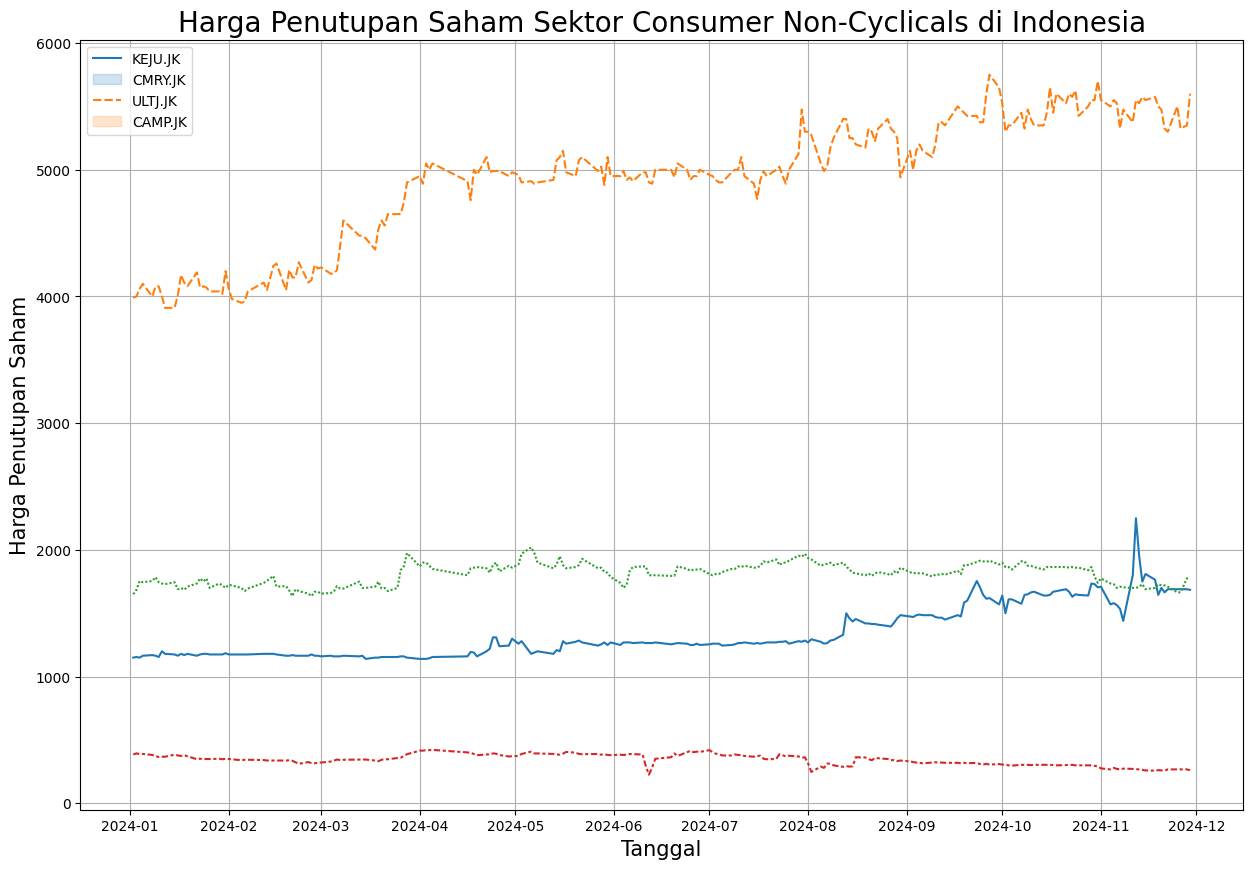

In [20]:
close_data = df.xs('Close', level=1, axis=1)
close_data.columns = close_data.columns.get_level_values(0)

# Plot data saham
plt.figure(figsize=(15, 10))
sns.lineplot(data = close_data)
plt.title('Harga Penutupan Saham Sektor Consumer Non-Cyclicals di Indonesia', fontsize=20)
plt.xlabel('Tanggal', fontsize=15)
plt.ylabel('Harga Penutupan Saham', fontsize=15)
plt.grid()
plt.legend(close_data.columns, loc='upper left')
plt.show()

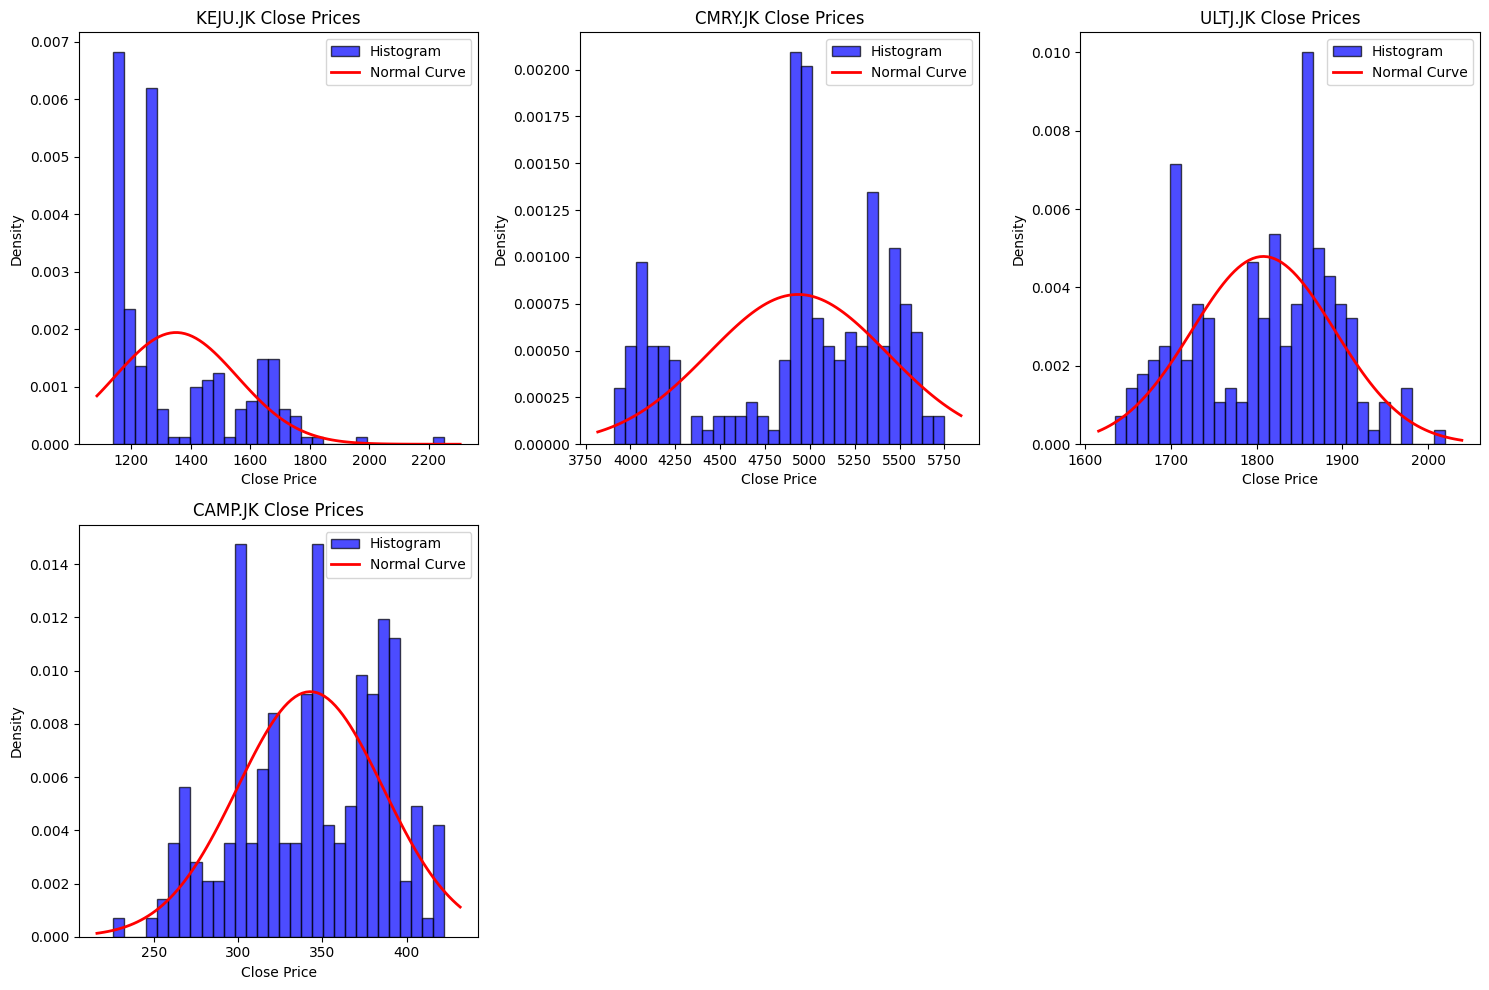

,Mean,Median,Std Dev,Min,Q1,Q3,Max,Kurtosis,Volatility
Ticker,,,,,,,,,
KEJU.JK,1350.389908,1265.0,205.434146,1140.0,1176.25,1485.0,2250.0,0.744745,0.152130
CMRY.JK,4934.036697,4995.0,498.991138,3910.0,4650.00,5325.0,5750.0,-0.720895,0.101132
ULTJ.JK,1807.821101,1820.0,83.272359,1635.0,1730.00,1870.0,2020.0,-0.894568,0.046062
CAMP.JK,342.807339,346.0,43.312704,226.0,306.00,381.5,422.0,-0.799895,0.126347


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Ambil data Close dari DataFrame multi-indeks
close_data = df.xs('Close', level=1, axis=1)

# Deskripsi statistik
stats_summary = close_data.describe().T  # Statistik dasar (mean, std, min, quartiles)
stats_summary['Kurtosis'] = close_data.kurtosis()  # Kurtosis
stats_summary['Volatility'] = close_data.std() / close_data.mean()  # Volatilitas (std/mean)

# Tampilkan DataFrame deskripsi statistik
stats_summary = stats_summary.rename(columns={
    'mean': 'Mean',
    'std': 'Std Dev',
    'min': 'Min',
    '25%': 'Q1',
    '50%': 'Median',
    '75%': 'Q3',
    'max': 'Max'
})
stats_summary = stats_summary[['Mean', 'Median', 'Std Dev', 'Min', 'Q1', 'Q3', 'Max', 'Kurtosis', 'Volatility']]

# Plot histogram dengan garis distribusi normal
num_tickers = len(close_data.columns)
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=False, sharey=False)

# Flatten axis untuk indexing yang lebih mudah
axes = axes.flatten()

for i, ticker in enumerate(close_data.columns):
    ax = axes[i]
    data = close_data[ticker].dropna()
    
    # Plot histogram
    ax.hist(data, bins=30, alpha=0.7, color='blue', edgecolor='black', density=True, label='Histogram')
    
    # Tambahkan garis normalitas
    mu, std = data.mean(), data.std()
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'r', linewidth=2, label='Normal Curve')
    
    ax.set_title(f'{ticker} Close Prices')
    ax.set_xlabel('Close Price')
    ax.set_ylabel('Density')
    ax.legend()

# Hapus subplot kosong jika jumlah saham kurang dari jumlah grid (6)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Tampilkan deskripsi statistik
stats_summary


In [22]:
# Calculate log returns
df_log_returns = np.log(close_data/close_data.shift(1))

# Drop the NaN values (which result from the first row after calculating returns)
df_log_returns.dropna(inplace=True)

# Print the log returns
df_log_returns

Ticker,KEJU.JK,CMRY.JK,ULTJ.JK,CAMP.JK
Date,,,,
2024-01-03 00:00:00+00:00,0.004338,0.002503,0.020990,0.020514
2024-01-04 00:00:00+00:00,-0.004338,0.014889,0.040703,-0.010204
2024-01-05 00:00:00+00:00,0.012959,0.009804,-0.005714,0.000000
2024-01-08 00:00:00+00:00,0.004283,-0.024693,0.005714,-0.020726
2024-01-09 00:00:00+00:00,-0.004283,0.019803,0.016950,-0.026527
...,...,...,...,...
2024-11-22 00:00:00+00:00,0.014903,-0.004706,-0.005831,0.038027
2024-11-25 00:00:00+00:00,0.000000,0.037041,-0.026668,0.000000
2024-11-26 00:00:00+00:00,0.000000,-0.032335,0.000000,0.000000


In [23]:
from scipy.stats import kstest

# Simpan hasil uji normalitas
normality_results = []

# Kolmogorov-Smirnov Test untuk setiap ticker
for ticker in df_log_returns:
    log_returns = df_log_returns[ticker].dropna()  # Drop nilai NaN jika ada
    ks_stat, p_value = kstest(log_returns, 'norm', args=(log_returns.mean(), log_returns.std()))
    
    # Simpan hasil uji normalitas
    normality_results.append({
        'Ticker': ticker,
        'KS Statistic': ks_stat,
        'P-Value': p_value,
        'Normal (p > 0.05)': p_value > 0.05  # True jika tidak ada bukti untuk menolak H0 (berdistribusi normal)
    })

# Membuat DataFrame untuk hasil uji normalitas
normality_df = pd.DataFrame(normality_results)
normality_df

,Ticker,KS Statistic,P-Value,Normal (p > 0.05)
0,KEJU.JK,0.230425,1.301842e-10,False
1,CMRY.JK,0.091719,4.869268e-02,False
2,ULTJ.JK,0.080957,1.100605e-01,True
3,CAMP.JK,0.196972,7.478597e-08,False


In [24]:
mean = df_log_returns.mean()
mean

Ticker
KEJU.JK    0.001760
CMRY.JK    0.001562
ULTJ.JK    0.000349
CAMP.JK   -0.001786
dtype: float64

In [25]:
cov_matrix = df_log_returns.cov()
cov_matrix

Ticker,KEJU.JK,CMRY.JK,ULTJ.JK,CAMP.JK
Ticker,,,,
KEJU.JK,0.001137,0.000030,0.000027,0.000019
CMRY.JK,0.000030,0.000445,0.000026,-0.000033
ULTJ.JK,0.000027,0.000026,0.000375,0.000032
CAMP.JK,0.000019,-0.000033,0.000032,0.002402


In [26]:
# Vector of ones (1p), same length as the number of assets
ones = np.ones(cov_matrix.shape[0])

# Inverse of the covariance matrix (Σ^(-1))
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Numerator: Σ^(-1) * 1p
numerator = np.dot(inv_cov_matrix, ones)

# Denominator: 1p^T * Σ^(-1) * 1p
denominator = np.dot(ones.T, numerator)

# Weights: W = (Σ^(-1) * 1p) / (1p^T * Σ^(-1) * 1p)
weights = numerator / denominator
weights

array([0.13378733, 0.36642206, 0.42819019, 0.07160042])

In [27]:
# Bobot portofolio
weights = np.array([0.11401035, 0.03765435, 0.21477826, 0.17120321, 0.46235383])

# Pastikan hanya kolom log return yang dikalikan dengan bobot
# Menghindari kolom non-numerik seperti 'Date' jika ada
portfolio_log_returns = (df_log_returns * weights).sum(axis=1)

# Buat DataFrame baru untuk portofolio
portfolio_df = pd.DataFrame({
    'Portfolio Log Return': portfolio_log_returns
})

# Cetak hasil
portfolio_df


ValueError: Unable to coerce to Series, length must be 4: given 5

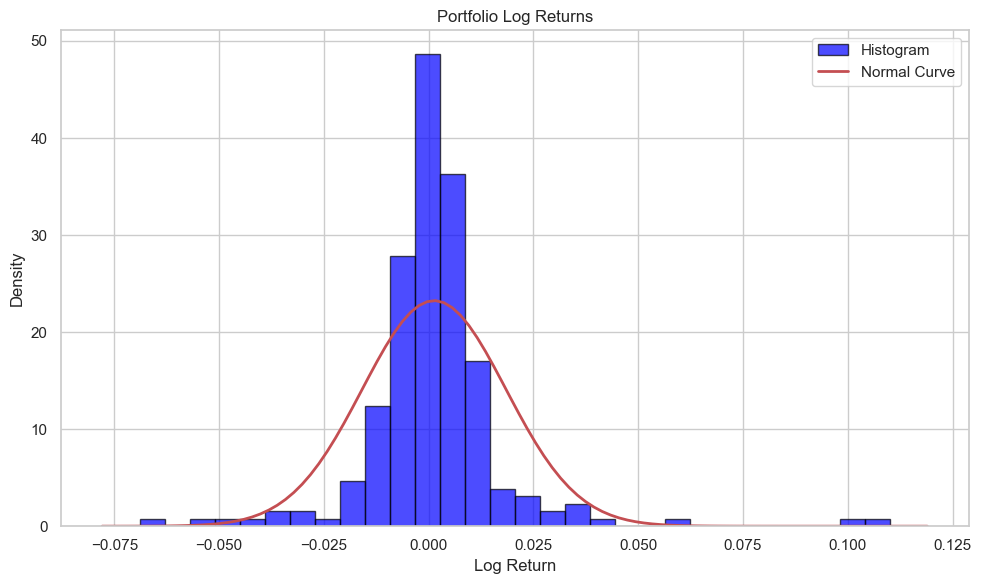

,count,Mean,Std Dev,Min,Q1,Median,Q3,Max,Kurtosis,Skewness,Volatility
0,217.0,0.001293,0.017162,-0.06897,-0.005536,0.000861,0.007164,0.110029,14.235543,1.702187,13.278253


In [ ]:
# Deskripsi statistik untuk portfolio_log_returns
portfolio_stats = portfolio_log_returns.describe().rename({
    'mean': 'Mean',
    'std': 'Std Dev',
    'min': 'Min',
    '25%': 'Q1',
    '50%': 'Median',
    '75%': 'Q3',
    'max': 'Max'
})
portfolio_stats['Kurtosis'] = portfolio_log_returns.kurtosis()
portfolio_stats['Skewness'] = portfolio_log_returns.skew()
portfolio_stats['Volatility'] = portfolio_log_returns.std() / portfolio_log_returns.mean()

# Konversi ke DataFrame untuk visualisasi
portfolio_stats_df = pd.DataFrame(portfolio_stats).T

# Plot histogram dengan garis distribusi normal
plt.figure(figsize=(10, 6))
data = portfolio_log_returns.dropna()

# Histogram
plt.hist(data, bins=30, alpha=0.7, color='blue', edgecolor='black', density=True, label='Histogram')

# Garis distribusi normal
mu, std = data.mean(), data.std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label='Normal Curve')

# Label dan Judul
plt.title('Portfolio Log Returns')
plt.xlabel('Log Return')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Tampilkan deskripsi statistik
portfolio_stats_df


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


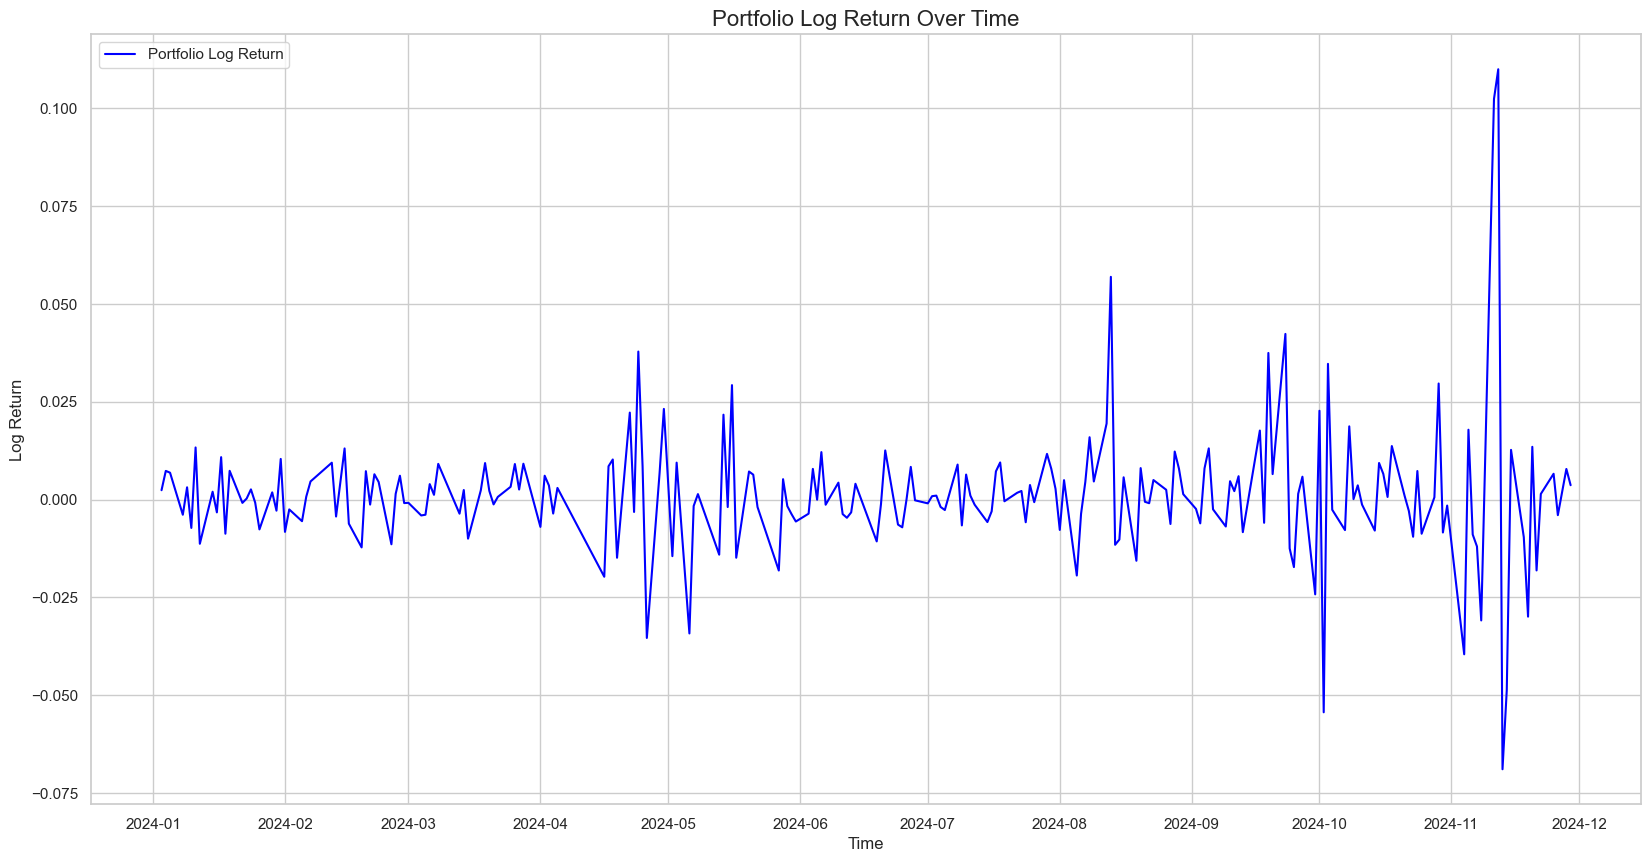

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur gaya visualisasi seaborn
sns.set(style="whitegrid")

# Plot log return portofolio
plt.figure(figsize=(20, 10))
sns.lineplot(data=portfolio_df, x=portfolio_df.index, y='Portfolio Log Return', color='blue', label='Portfolio Log Return')

# Menambahkan judul dan label
plt.title('Portfolio Log Return Over Time', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Log Return', fontsize=12)
plt.legend(loc='upper left')

# Menampilkan grafik
plt.show()


In [ ]:
# Hitung rata-rata dan standar deviasi log return portofolio
mean = portfolio_df.mean()
std = portfolio_df.std()

# Uji Kolmogorov-Smirnov
ks_stat, p_value = kstest(portfolio_df, 'norm', args=(mean, std))

# Hasil uji
print("KS Statistic:", ks_stat)
print("P-Value:", p_value)

# Kesimpulan
if p_value > 0.05:
    print("Kesimpulan: Data log return portofolio berdistribusi normal (p > 0.05).")
else:
    print("Kesimpulan: Data log return portofolio tidak berdistribusi normal (p <= 0.05).")

KS Statistic: [0.11406609]
P-Value: [0.00646993]
Kesimpulan: Data log return portofolio tidak berdistribusi normal (p <= 0.05).


In [ ]:
import numpy as np
import pandas as pd

# Data log return portofolio
portfolio_log_returns = portfolio_df['Portfolio Log Return'].dropna()

# Nilai portofolio awal (V0), asumsi = 1 miliar
V0 = 1000000000

# Tingkat signifikansi 95% (percentile 5%)
alpha = 0.05

# Hitung persentil ke-5 dari data log return
percentile_alpha = np.percentile(portfolio_log_returns, alpha * 100)

# Periode waktu
T_values = [1, 7, 30]

# Hitung VaR untuk setiap periode
historical_var_results = {
    "Periode (Hari)": T_values,
    "VaR Historis": [V0 * abs(percentile_alpha) * np.sqrt(T) for T in T_values]
}

# Buat DataFrame dari hasil
historical_var_df = pd.DataFrame(historical_var_results)

# Tampilkan DataFrame
historical_var_df


,Periode (Hari),VaR Historis
0,1,1.509850e+07
1,7,3.994688e+07
2,30,8.269789e+07
